In [ ]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

In [ ]:
## Importing libraries
import pandas as pd
import numpy as np
from tqdm import tqdm
tqdm.pandas()

## Pandas Display options
pd.set_option('display.max_columns',0)
pd.set_option('display.max_colwidth',0)

In [ ]:
train_data = pd.read_csv('training_set_features.csv')
test_data = pd.read_csv('test_set_features.csv')
train_labels = pd.read_csv('training_set_labels.csv')

In [ ]:
if train_data.empty:
    print("train_data is empty.")
else:
    print("train_data is not empty.")

train_data is not empty.


In [ ]:
print(train_data.shape)
print(test_data.shape)

(26707, 36)
(26708, 36)


In [ ]:
# Check for missing values in the training set features
train_data_missing = train_data.isnull().sum()
missing_values_training = train_data_missing[train_data_missing > 0]
print(missing_values_training)

xyz_concern                    92   
xyz_knowledge                  116  
behavioral_antiviral_meds      71   
behavioral_avoidance           208  
behavioral_face_mask           19   
behavioral_wash_hands          42   
behavioral_large_gatherings    87   
behavioral_outside_home        82   
behavioral_touch_face          128  
doctor_recc_xyz                2160 
doctor_recc_seasonal           2160 
chronic_med_condition          971  
child_under_6_months           820  
health_worker                  804  
health_insurance               12274
opinion_xyz_vacc_effective     391  
opinion_xyz_risk               388  
opinion_xyz_sick_from_vacc     395  
opinion_seas_vacc_effective    462  
opinion_seas_risk              514  
opinion_seas_sick_from_vacc    537  
education                      1407 
income_poverty                 4423 
marital_status                 1408 
rent_or_own                    2042 
employment_status              1463 
household_adults               249  
h

In [ ]:
# Check for missing values in the testing set features
test_data_missing = test_data.isnull().sum()
missing_values_testing = test_data_missing[train_data_missing > 0]
print(missing_values_testing)

xyz_concern                    85   
xyz_knowledge                  122  
behavioral_antiviral_meds      79   
behavioral_avoidance           213  
behavioral_face_mask           19   
behavioral_wash_hands          40   
behavioral_large_gatherings    72   
behavioral_outside_home        82   
behavioral_touch_face          128  
doctor_recc_xyz                2160 
doctor_recc_seasonal           2160 
chronic_med_condition          932  
child_under_6_months           813  
health_worker                  789  
health_insurance               12228
opinion_xyz_vacc_effective     398  
opinion_xyz_risk               380  
opinion_xyz_sick_from_vacc     375  
opinion_seas_vacc_effective    452  
opinion_seas_risk              499  
opinion_seas_sick_from_vacc    521  
education                      1407 
income_poverty                 4497 
marital_status                 1442 
rent_or_own                    2036 
employment_status              1471 
household_adults               225  
h

In [ ]:
# Fill numerical columns with mean
numeric_columns = train_data.select_dtypes(include=['number']).columns
train_data[numeric_columns] = train_data[numeric_columns].fillna(train_data[numeric_columns].mean())

# Fill categorical columns with mode
categorical_columns = train_data.select_dtypes(include=['object']).columns
train_data[categorical_columns] = train_data[categorical_columns].fillna(train_data[categorical_columns].mode().iloc[0])

# Repeat the same for the test data
test_data[numeric_columns] = test_data[numeric_columns].fillna(test_data[numeric_columns].mean())
test_data[categorical_columns] = test_data[categorical_columns].fillna(test_data[categorical_columns].mode().iloc[0])

In [ ]:
# Check for missing values in the training set features
train_data_missing = train_data.isnull().sum()
missing_values_training = train_data_missing[train_data_missing > 0]
print(missing_values_training)

Series([], dtype: int64)


In [ ]:
# Check for missing values in the testing set features
test_data_missing = test_data.isnull().sum()
missing_values_testing = test_data_missing[train_data_missing > 0]
print(missing_values_testing)

Series([], dtype: int64)


Standardization and Normalization

Adding New Features

In [ ]:
unique_values = test_data['age_group'].unique()
for value in unique_values:
    print(value)

35 - 44 Years
18 - 34 Years
55 - 64 Years
65+ Years
45 - 54 Years


In [ ]:
# Define the mapping from age groups to numerical values
age_mapping = {
    '18 - 34 Years': 26,  # Midpoint of 18 and 34
    '35 - 44 Years': 39.5,  # Midpoint of 35 and 44
    '45 - 54 Years': 49.5,  # Midpoint of 45 and 54
    '55 - 64 Years': 59.5,  # Midpoint of 55 and 64
    '65+ Years': 70  # A representative value for 65+ (you can choose another value if preferred)
}

# Create a new column with the mapped numerical values
test_data['age_group_numeric'] = test_data['age_group'].map(age_mapping)
train_data['age_group_numeric'] = train_data['age_group'].map(age_mapping)

In [ ]:
train_data = train_data.drop(columns=['age_group'])
test_data = test_data.drop(columns=['age_group'])

Household size - merging two columns

In [ ]:
# Household size
train_data['household_size'] = train_data['household_adults'] + train_data['household_children']
test_data['household_size'] = test_data['household_adults'] + test_data['household_children']
train_data = train_data.drop(columns=['household_adults', 'household_children'])
test_data = test_data.drop(columns=['household_adults', 'household_children'])

Employment status numerica column - 0/1

In [ ]:
unique_values1 = test_data['employment_status'].unique()
for value in unique_values1:
    print(value)

Employed
Not in Labor Force
Unemployed


In [ ]:
# Define the mapping from employment to numerical values
employ = {
    'Unemployed': 0,
    'Not in Labor Force': 0,
    'Employed': 1
}

# Create a new column with the mapped numerical values
test_data['employment_status'] = test_data['employment_status'].map(employ)
train_data['employment_status'] = train_data['employment_status'].map(employ)

In [ ]:
train_data = pd.get_dummies(train_data, columns=['census_msa', 'rent_or_own'], drop_first=True)

# One-Hot Encode 'census_msa' and 'rent_or_own' in the test set
test_data = pd.get_dummies(test_data, columns=['census_msa', 'rent_or_own'], drop_first=True)

In [ ]:
unique_values2 = test_data['income_poverty'].unique()
for value in unique_values2:
    print(value)

> $75,000
Below Poverty
<= $75,000, Above Poverty


In [ ]:
# Mapping dictionary
income_mapping = {
    'Below Poverty': 0,
    '<= $75,000, Above Poverty': 1,
    '> $75,000' : 2
}

# Converting the column to numerical values
test_data['income_poverty'] = test_data['income_poverty'].map(income_mapping)
train_data['income_poverty'] = train_data['income_poverty'].map(income_mapping)

# Fill empty values with 0
train_data['income_poverty'].fillna(0, inplace=True)
test_data['income_poverty'].fillna(0, inplace=True)

In [ ]:
train_data['has_chronic_condition'] = train_data['chronic_med_condition'].fillna(0).astype(int)
test_data['has_chronic_condition'] = test_data['chronic_med_condition'].fillna(0).astype(int)

In [ ]:
# drop employment_occupation and employment_industry

train_data.drop(['employment_occupation', 'employment_industry'], axis=1, inplace=True)
test_data.drop(['employment_occupation', 'employment_industry'], axis=1, inplace=True)


In [ ]:
df_relevant = train_data[['doctor_recc_seasonal', 'doctor_recc_xyz', 'health_insurance', 'child_under_6_months']]

# Filling missing values with mode
for column in df_relevant.columns:
    mode_value = df_relevant[column].mode()[0]
    train_data[column].fillna(mode_value, inplace=True)

df_relevant = test_data[['doctor_recc_seasonal', 'doctor_recc_xyz']]

# Filling missing values with mode
for column in df_relevant.columns:
    mode_value = df_relevant[column].mode()[0]
    test_data[column].fillna(mode_value, inplace=True)

In [ ]:
behavioral_columns = ['behavioral_antiviral_meds', 'behavioral_avoidance', 'behavioral_face_mask', 'behavioral_wash_hands', 'behavioral_large_gatherings', 'behavioral_outside_home', 'behavioral_touch_face']
train_data['behavioral_score'] = train_data[behavioral_columns].sum(axis=1)
test_data['behavioral_score'] = test_data[behavioral_columns].sum(axis=1)

################################## drop the extra ones

In [ ]:
xyz_opinion = [
    'opinion_xyz_vacc_effective', 'opinion_xyz_risk', 'opinion_xyz_sick_from_vacc'
]

seas_opinion = [
    'opinion_seas_vacc_effective', 'opinion_seas_risk', 'opinion_seas_sick_from_vacc'
]

# Creating a new feature by averaging the values of the specified columns
train_data['opinion_xyz'] = train_data[xyz_opinion].mean(axis=1)
test_data['opinion_xyz'] = test_data[xyz_opinion].mean(axis=1)

train_data['opinion_seas'] = train_data[xyz_opinion].mean(axis=1)
test_data['opinion_seas'] = test_data[seas_opinion].mean(axis=1)

In [ ]:
# Define the mapping for the education column, preserving the ordinal nature
education_mapping = {
    '< 12 Years': 0,
    '12 Years': 1,
    'Some College': 2,
    'College Graduate': 3
}

# Apply the mapping to the education column
train_data['education'] = train_data['education'].map(education_mapping)
test_data['education'] = test_data['education'].map(education_mapping)

In [ ]:
sex_mapping = {
    'Female': 0,
    'Male': 1
}

# Apply the mapping to the education column
train_data['sex'] = train_data['sex'].map(sex_mapping)
test_data['sex'] = test_data['sex'].map(sex_mapping)

In [ ]:
# Create new features for the training set

region_dummies = pd.get_dummies(train_data['hhs_geo_region'], prefix='region')
train_data = pd.concat([train_data, region_dummies], axis=1)
train_data['marital_status_married'] = (train_data['marital_status'] == 'Married').astype(int)
train_data['marital_status_not_married'] = (train_data['marital_status'] == 'Not Married').astype(int)


train_data['combined_behavioral_indicator'] = train_data['behavioral_antiviral_meds'] * train_data['behavioral_face_mask']
train_data['opinion_divergence'] = (train_data['opinion_xyz_vacc_effective'] - train_data['opinion_seas_vacc_effective']).abs

In [ ]:
# similar data for test data
region_dummies = pd.get_dummies(test_data['hhs_geo_region'], prefix='region')
test_data = pd.concat([test_data, region_dummies], axis=1)
test_data['marital_status_married'] = (test_data['marital_status'] == 'Married').astype(int)
test_data['marital_status_not_married'] = (test_data['marital_status'] == 'Not Married').astype(int)


test_data['combined_behavioral_indicator'] = test_data['behavioral_antiviral_meds'] * test_data['behavioral_face_mask']
test_data['opinion_divergence'] = (test_data['opinion_xyz_vacc_effective'] - test_data['opinion_seas_vacc_effective']).abs

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Instantiate a LabelEncoder object
encoder = LabelEncoder()

# Identify non-numeric columns
non_numeric_columns = X.select_dtypes(include=['object']).columns.tolist()

# Iterate over non-numeric columns and encode them
for column in non_numeric_columns:
    X[column] = encoder.fit_transform(X[column])

In [645]:
y = train_labels['xyz_vaccine']
y2 = train_labels['seasonal_vaccine']
X = train_data.drop(columns=['race', 'marital_status', 'behavioral_antiviral_meds', 'behavioral_avoidance', 'behavioral_face_mask', 'behavioral_wash_hands', 'behavioral_large_gatherings', 'behavioral_outside_home', 'behavioral_touch_face'])


X_test = test_data[X.columns.tolist()]

In [646]:
# # Drop non-numeric columns
# for column in X.columns:
#     if X[column].dtype == 'object':
#         X.drop(column, axis=1, inplace=True)

# # Apply the same to test features
# for column in X_test.columns:
#     if X_test[column].dtype == 'object':
#         X_test.drop(column, axis=1, inplace=True)

# # Convert label to numeric if necessary
# if y.dtype == 'object':
#     y = pd.to_numeric(y, errors='coerce')

# # if y2.dtype == 'object':
# #     y2 = pd.to_numeric(y2, errors='coerce')

# # Handle any remaining missing values
# X.fillna(X.mean(), inplace=True)
# y.fillna(y.mean(), inplace=True)
# y2.fillna(y2.mean(), inplace=True)
# X_test.fillna(X_test.mean(), inplace=True)

LOgistic Regression for y and y1

In [647]:
x_train, x_test, y_train , y_test=train_test_split(X,y, test_size=.25, random_state=88)

In [648]:
x_train, x_test, y_train2 , y_test=train_test_split(X,y2, test_size=.25, random_state=88)

In [649]:
log = LogisticRegression()

log.fit(x_train,y_train)

print(f"Training Score : {log.score(x_train, y_train)}")
print(f"Testing Score : {log.score(x_test, y_test)}")

log.fit(x_train,y_train2)

print(f"Training Score : {log.score(x_train, y_train2)}")
print(f"Testing Score : {log.score(x_test, y_test)}")

ValueError: could not convert string to float: 'qufhixun'

In [623]:

log.fit(x_train,y_train2)

print(f"Training Score : {log.score(x_train, y_train2)}")
print(f"Testing Score : {log.score(x_test, y_test)}")

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

Training Score : 0.7729405891163255
Testing Score : 0.7731016923768159


In [624]:
pred_train=log.predict(x_train)
pred_test=log.predict(x_test)

In [626]:
from sklearn import metrics
cnfTrain=pd.DataFrame(metrics.confusion_matrix(y_train , pred_train), columns=["Pred_0", "Pred_1"],
                index=["Act_0", "Act_1"])
cnfTrain



from sklearn import metrics
cnfTrain=pd.DataFrame(metrics.confusion_matrix(y_train2 , pred_train), columns=["Pred_0", "Pred_1"],
                index=["Act_0", "Act_1"])
cnfTrain

,Pred_0,Pred_1
Act_0,9924,5880
Act_1,1232,2994


,Pred_0,Pred_1
Act_0,8664,2056
Act_1,2492,6818


In [627]:
print(metrics.classification_report(y_train, pred_train))
print(metrics.classification_report(y_train2, pred_train))

              precision    recall  f1-score   support

           0       0.89      0.63      0.74     15804
           1       0.34      0.71      0.46      4226

    accuracy                           0.64     20030
   macro avg       0.61      0.67      0.60     20030
weighted avg       0.77      0.64      0.68     20030

              precision    recall  f1-score   support

           0       0.78      0.81      0.79     10720
           1       0.77      0.73      0.75      9310

    accuracy                           0.77     20030
   macro avg       0.77      0.77      0.77     20030
weighted avg       0.77      0.77      0.77     20030



In [628]:
pd.DataFrame(log.predict_proba(x_train), columns=["Prob_0", "Prob_1"])

,Prob_0,Prob_1
0,0.808919,0.191081
1,0.822230,0.177770
2,0.726983,0.273017
3,0.865321,0.134679
4,0.140977,0.859023
...,...,...
20025,0.894317,0.105683
20026,0.086635,0.913365
20027,0.721361,0.278639
20028,0.862348,0.137652


In [ ]:
x_train1=x_train.copy()

x_train1["Actual_Default"]=y_train
x_train1["Prob_Default"]=log.predict_proba(x_train)[:, 1]

x_train1


,respondent_id,xyz_concern,xyz_knowledge,doctor_recc_xyz,doctor_recc_seasonal,chronic_med_condition,child_under_6_months,health_worker,health_insurance,opinion_xyz_vacc_effective,opinion_xyz_risk,opinion_xyz_sick_from_vacc,opinion_seas_vacc_effective,opinion_seas_risk,opinion_seas_sick_from_vacc,education,sex,income_poverty,employment_status,age_group_numeric,household_size,"census_msa_MSA, Principle City",census_msa_Non-MSA,rent_or_own_Rent,has_chronic_condition,behavioral_score,opinion_xyz,opinion_seas,region_atmpeygn,region_bhuqouqj,region_dqpwygqj,region_fpwskwrf,region_kbazzjca,region_lrircsnp,region_lzgpxyit,region_mlyzmhmf,region_oxchjgsf,region_qufhixun,marital_status_married,marital_status_not_married,combined_behavioral_indicator,Actual_Default,Prob_Default
9353,0.350221,0.333333,0.5,0.000000,0.000000,0.0,0.0,0.0,1.00000,0.50,0.00,0.00,0.50,0.00,0.50,3,1,1,0,70.0,0.333333,False,False,False,0,5.0,0.166667,0.166667,False,False,False,False,False,False,False,False,False,True,1,0,0.0,0,0.036931
6317,0.236539,0.666667,0.5,0.220312,0.329735,0.0,0.0,0.0,1.00000,0.00,0.50,0.00,0.75,0.00,0.00,0,0,1,1,49.5,0.333333,True,False,True,0,3.0,0.166667,0.166667,False,False,True,False,False,False,False,False,False,False,0,1,0.0,0,0.021136
13542,0.507077,0.666667,0.5,0.000000,0.000000,0.0,1.0,0.0,1.00000,1.00,1.00,0.75,1.00,0.75,1.00,1,0,1,1,26.0,0.000000,False,True,False,0,2.0,0.916667,0.916667,False,False,False,False,False,False,False,False,True,False,0,1,0.0,0,0.415897
23986,0.898150,0.666667,1.0,0.000000,0.000000,1.0,0.0,0.0,0.87972,0.50,0.00,1.00,0.50,0.00,1.00,2,0,0,0,70.0,0.000000,False,False,False,1,5.0,0.500000,0.500000,False,False,False,False,True,False,False,False,False,False,0,1,0.0,0,0.016203
16025,0.600052,0.333333,1.0,1.000000,1.000000,0.0,0.0,0.0,1.00000,0.00,0.00,0.25,1.00,1.00,0.75,3,0,1,1,49.5,0.333333,True,False,True,0,6.0,0.083333,0.083333,False,False,False,False,False,True,False,False,False,False,0,1,0.0,1,0.041400
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24938,0.933798,0.000000,1.0,0.000000,0.000000,1.0,0.0,0.0,1.00000,0.25,0.00,0.00,0.75,0.25,0.75,3,0,1,1,26.0,1.333333,False,True,True,1,3.0,0.083333,0.083333,False,False,False,False,False,False,False,False,False,True,1,0,0.0,0,0.012622
2481,0.092900,1.000000,0.5,0.000000,1.000000,0.0,0.0,0.0,0.87972,0.75,0.75,0.75,1.00,0.75,0.25,1,0,1,0,70.0,0.000000,False,False,True,0,5.0,0.750000,0.750000,False,False,False,False,False,False,False,False,False,True,0,1,0.0,0,0.082732
4047,0.151539,1.000000,0.5,0.000000,0.000000,0.0,0.0,0.0,0.87972,1.00,0.75,1.00,1.00,0.75,0.75,3,1,1,1,26.0,1.000000,False,True,False,0,5.0,0.916667,0.916667,False,False,False,False,False,False,True,False,False,False,1,0,0.0,0,0.172260
6432,0.240845,0.333333,0.5,0.000000,0.000000,0.0,0.0,0.0,1.00000,1.00,0.25,0.00,0.75,0.00,0.00,2,0,1,1,39.5,0.666667,True,False,False,0,3.0,0.416667,0.416667,False,False,False,False,False,True,False,False,False,False,1,0,0.0,1,0.153967


In [ ]:
# Decile Analysis
def profile_decile(X,y,trained_model):
    X_1=X.copy()
    y_1=y.copy()
    y_pred1=trained_model.predict(X_1)
    X_1["Prob_Event"]=trained_model.predict_proba(X_1)[:,1]
    X_1["Y_actual"]=y_1
    X_1["Y_pred"]=y_pred1
    X_1["Rank"]=pd.qcut(X_1["Prob_Event"], 10, labels=np.arange(0,10,1))
    X_1["numb"]=10
    X_1["Decile"]=X_1["numb"]-X_1["Rank"].astype("int")

    profile=pd.DataFrame(X_1.groupby("Decile") \
                        .apply(lambda x: pd.Series({
        'min_score'   : x["Prob_Event"].min(),
        'max_score'   : x["Prob_Event"].max(),
        'Event'       : x["Y_actual"].sum(),
        'Non_event'   : x["Y_actual"].count()-x["Y_actual"].sum(),
        'Total'       : x["Y_actual"].count() })))
    return profile

In [ ]:
newtrain_pred=np.where(log.predict_proba(x_train)[:,1] > 0.232280104, 1, 0) # based on KS value

In [ ]:
cnfNewTrain=pd.DataFrame(metrics.confusion_matrix(y_train , newtrain_pred), columns=["Pred_0", "Pred_1"],
                index=["Act_0", "Act_1"])
cnfNewTrain

,Pred_0,Pred_1
Act_0,12854,2950
Act_1,1262,2964


In [ ]:
print(metrics.classification_report(y_train , newtrain_pred))

              precision    recall  f1-score   support

           0       0.91      0.81      0.86     15804
           1       0.50      0.70      0.58      4226

    accuracy                           0.79     20030
   macro avg       0.71      0.76      0.72     20030
weighted avg       0.82      0.79      0.80     20030



In [ ]:
newtest_pred=np.where(log.predict_proba(x_test)[:,1] > 0.229209326, 1, 0) # based on KS value

In [ ]:
cnfNewTest=pd.DataFrame(metrics.confusion_matrix(y_test , newtest_pred), columns=["Pred_0", "Pred_1"],
                index=["Act_0", "Act_1"])
cnfNewTest

,Pred_0,Pred_1
Act_0,4258,971
Act_1,492,956


In [ ]:
print(metrics.classification_report(y_test , newtest_pred))

              precision    recall  f1-score   support

           0       0.90      0.81      0.85      5229
           1       0.50      0.66      0.57      1448

    accuracy                           0.78      6677
   macro avg       0.70      0.74      0.71      6677
weighted avg       0.81      0.78      0.79      6677



Text(0.5, 0, 'fpr')

Text(0, 0.5, 'tpr')

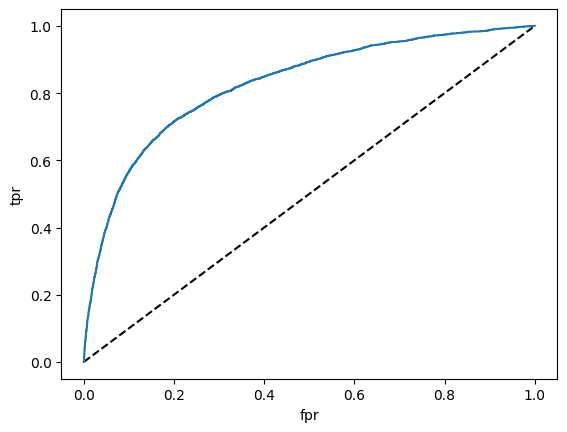

In [ ]:
# Receiver Operating Characterestics
import matplotlib.pyplot as plt
probs=log.predict_proba(x_train)[:,1]

fpr, tpr, threshold=metrics.roc_curve(y_train,probs )
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr, label='logistic')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.show()

In [ ]:
metrics.roc_auc_score(y_train,probs)

0.8264385462330011